## Observations and Insights 

Two of the promising treatments, Ramicane and Capomulin, outperformed the placebo in reducing the tumor volume of mice by the end of the trial. The other two promising treatments, Ceftamin and Infubinol, did not.

Ramicane and Capomulin performed consistently across the study group - ie. there were no outliers.

Tumor volume has a strong positive correlation with mouse weight. This is likely confounded by the fact that the tumor itself does have weight. Future studies could explore this further by weighing the mice before they develop tumors (I'm assuming they were weighed at timepoint 0?)

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [2]:
# Removing the mouse with duplicate timepoints before adding in the metadata - as an idealistic 
# pharma analyst at pymaceuticals, I would keep the data blinded while cleaning it!

In [3]:
# finding the mouse with duplicate timepoints

In [4]:
mice = study_results["Mouse ID"].unique()
len(mice)

249

In [5]:
problem_mice = []

for mouse in mice:
    check_rows = study_results.loc[study_results["Mouse ID"] == mouse,:]
    if len(check_rows["Timepoint"].unique()) != check_rows["Timepoint"].count():
                      problem_mice.append(mouse)

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

problem_mice

['g989']

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
study_results.loc[study_results["Mouse ID"] == problem_mice[0],:]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,0,45.000000,0
137,g989,0,45.000000,0
329,g989,5,48.786801,0
360,g989,5,47.570392,0
620,g989,10,51.745156,0
681,g989,10,49.880528,0
815,g989,15,51.325852,1
869,g989,15,53.442020,0
950,g989,20,55.326122,1
1111,g989,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_results = study_results.loc[study_results["Mouse ID"] != problem_mice[0],:]

In [9]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_results["Mouse ID"].unique())
# Dropped one Mouse ID

248

In [2]:
#combining cleaned study results with mouse metadata
mouse_metadata=mouse_metadata.set_index("Mouse ID")

In [11]:
results = cleaned_results.join(mouse_metadata, on="Mouse ID", how="left")

In [12]:
results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

grouped = results.groupby("Drug Regimen")

mean = grouped["Tumor Volume (mm3)"].mean()
median = grouped["Tumor Volume (mm3)"].median()
var = grouped["Tumor Volume (mm3)"].var()
std = grouped["Tumor Volume (mm3)"].std()
sem = grouped["Tumor Volume (mm3)"].sem()


In [14]:
Summary = pd.DataFrame({"Mean Tumor Volume":mean,
                       "Median Tumor Volume":median,
                        "Variance": var,
                       "Standard Deviation":std,
                       "Standard Error":sem})
Summary


,Mean Tumor Volume,Median Tumor Volume,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [71]:
# Bar Charts of measurements per Drug Regimen
# Using pyplot
measurements = grouped["Timepoint"].count()

In [72]:
regimens = measurements.index
regimens

Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug Regimen')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

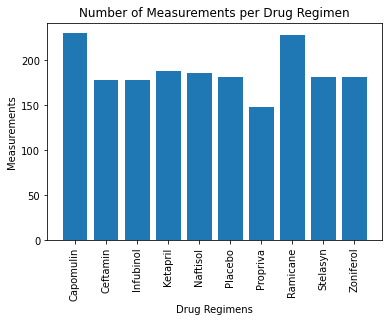

In [74]:
plt.bar(regimens, measurements)
plt.title("Number of Measurements per Drug Regimen")
plt.xlabel("Drug Regimens")
plt.ylabel("Measurements")
plt.xticks(rotation = 90)

<AxesSubplot:title={'center':'Number of Measurements per Drug Regimen'}, xlabel='Drug Regimen', ylabel='Measurements'>

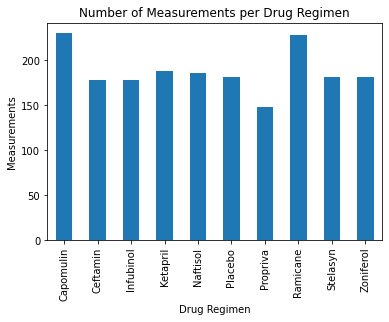

In [75]:
# using DataFrame.plot()

measurements.plot(kind="bar", rot="90", title="Number of Measurements per Drug Regimen", ylabel="Measurements")

In [76]:
# Pie Charts of Sex of Mice
# going back to the metadata so we have one row per mouse
# but we need to remember to drop our problem mouse!

In [3]:
mouse_metadata.drop(labels="g989", axis=0, inplace=True)
mouse_metadata

,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,
k403,Ramicane,Male,21,16
s185,Capomulin,Female,3,17
x401,Capomulin,Female,16,15
m601,Capomulin,Male,22,17
g791,Ramicane,Male,11,16
...,...,...,...,...
z314,Stelasyn,Female,21,28
z435,Propriva,Female,12,26
z581,Infubinol,Female,24,25


In [4]:
count_of_sex = mouse_metadata["Sex"].value_counts()

<AxesSubplot:title={'center':'Sex Distribution of Mice'}>

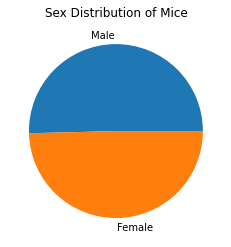

In [5]:
# Using dataframe.plot()

count_of_sex.plot(kind="pie", ylabel="", title ="Sex Distribution of Mice", legend = False)

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = count_of_sex.keys()
# from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.keys.html


Text(0.5, 1.0, 'Sex Distribution of Mice')

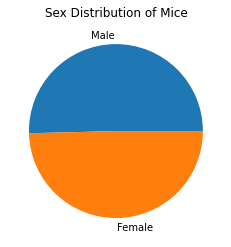

In [24]:
plt.pie(count_of_sex, labels=labels)
plt.title("Sex Distribution of Mice")


## Quartiles, Outliers and Boxplots

In [25]:
results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [26]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# I'm also including the placebo group - hard to draw conclusions at the end otherwise!
promising = results.loc[(results["Drug Regimen"] == "Capomulin") | (results["Drug Regimen"] == "Ramicane") | (results["Drug Regimen"] == "Infubinol") | (results["Drug Regimen"] == "Ceftamin") | (results["Drug Regimen"] == "Placebo"),:]

In [27]:
# Start by getting the last (greatest) timepoint for each mouse

grouped_promising = promising.groupby("Mouse ID")
last_measurement_promising = grouped_promising["Timepoint"].max()
last_measurement_promising

Mouse ID
a203    45
a251    45
a262    45
a275    45
a411    45
        ..
y769    45
y793    45
y865    45
z578    45
z581    45
Name: Timepoint, Length: 125, dtype: int64

In [28]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
promising = promising.join(last_measurement_promising, on="Mouse ID", how="left", rsuffix = "last")

In [29]:
promising = promising.rename(columns={"Timepointlast": "Last Timepoint"})
promising.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Last Timepoint
0,b128,0,45.0,0,Capomulin,Female,9,22,45
29,c326,0,45.0,0,Infubinol,Female,18,25,5
30,c139,0,45.0,0,Infubinol,Male,11,28,45
31,v339,0,45.0,0,Infubinol,Male,20,26,5
32,a577,0,45.0,0,Infubinol,Female,6,25,30


In [30]:
#final tumor volume for each mouse is the tumor volume corresponding to their last timepoint
promising_final_results = promising.loc[promising["Timepoint"] == promising["Last Timepoint"] ,:]

In [31]:
promising_final_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Last Timepoint
155,l872,0,45.000000,0,Placebo,Male,19,30,0
182,u153,0,45.000000,0,Ceftamin,Female,11,25,0
194,b447,0,45.000000,0,Ceftamin,Male,2,30,0
217,x226,0,45.000000,0,Ceftamin,Male,23,28,0
222,t573,0,45.000000,0,Ceftamin,Female,15,27,0
...,...,...,...,...,...,...,...,...,...
1885,i177,45,33.562402,3,Ramicane,Male,10,18,45
1888,r944,45,41.581521,2,Capomulin,Male,12,25,45
1889,u364,45,31.023923,3,Capomulin,Male,18,17,45
1890,p438,45,61.433892,1,Ceftamin,Female,11,26,45


In [32]:
#double checking that the table above is correct and there were mice that only got measured
#once or twice... didn't want to accidentally have dropped the wrong rows!
study_results.loc[study_results["Mouse ID"]=="u153",:]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
182,u153,0,45.0,0


In [33]:
study_results.loc[study_results["Mouse ID"]=="c326",:]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
29,c326,0,45.000000,0
420,c326,5,36.321346,0


In [34]:
#making dataframes for the final results of each regimen

In [37]:
placebo = promising_final_results.loc[promising_final_results["Drug Regimen"]=='Placebo',:]
ceftamin = promising_final_results.loc[promising_final_results["Drug Regimen"]=='Ceftamin',:]
infubinol = promising_final_results.loc[promising_final_results["Drug Regimen"]=='Infubinol',:]
ramicane = promising_final_results.loc[promising_final_results["Drug Regimen"]=='Ramicane',:]
capomulin = promising_final_results.loc[promising_final_results["Drug Regimen"]=='Capomulin',:]

In [39]:
#Quartiles & IQR

In [40]:
placebo_quartiles = placebo["Tumor Volume (mm3)"].quantile([.25,.5,.75])
placebo_lowerq = placebo_quartiles[.25]
placebo_upperq = placebo_quartiles[.75]
placebo_iqr = placebo_upperq-placebo_lowerq
placebo_iqr

15.191386480000006

In [43]:
ceftamin_quartiles = ceftamin["Tumor Volume (mm3)"].quantile([.25,.5,.75])
ceftamin_lowerq = ceftamin_quartiles[.25]
ceftamin_upperq = ceftamin_quartiles[.75]
ceftamin_iqr = ceftamin_upperq-placebo_lowerq
ceftamin_iqr

11.356928339999996

In [46]:
infubinol_quartiles = infubinol["Tumor Volume (mm3)"].quantile([.25,.5,.75])
infubinol_lowerq = infubinol_quartiles[.25]
infubinol_upperq = infubinol_quartiles[.75]
infubinol_iqr = infubinol_upperq-infubinol_lowerq
infubinol_iqr

11.477135160000003

In [47]:
ramicane_quartiles = ramicane["Tumor Volume (mm3)"].quantile([.25,.5,.75])
ramicane_lowerq = ramicane_quartiles[.25]
ramicane_upperq = ramicane_quartiles[.75]
ramicane_iqr = ramicane_upperq-ramicane_lowerq
ramicane_iqr

9.098536719999998

In [48]:
capomulin_quartiles = capomulin["Tumor Volume (mm3)"].quantile([.25,.5,.75])
capomulin_lowerq = capomulin_quartiles[.25]
capomulin_upperq = capomulin_quartiles[.75]
capomulin_iqr = capomulin_upperq-capomulin_lowerq
capomulin_iqr

7.781863460000004

In [49]:
#checking for outliers
#outlier = upperq +1.5*iqr or lowerq-1.5*iqr

In [50]:
placebo.loc[(placebo["Tumor Volume (mm3)"] >= placebo_upperq+1.5*placebo_iqr) |
             (placebo["Tumor Volume (mm3)"] <= placebo_lowerq-1.5*placebo_iqr),:]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Last Timepoint


In [51]:
ceftamin.loc[(ceftamin["Tumor Volume (mm3)"] >= ceftamin_upperq+1.5*ceftamin_iqr) |
             (ceftamin["Tumor Volume (mm3)"] <= ceftamin_lowerq-1.5*ceftamin_iqr),:]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Last Timepoint


In [52]:
infubinol.loc[(infubinol["Tumor Volume (mm3)"] >= infubinol_upperq+1.5*infubinol_iqr) |
             (infubinol["Tumor Volume (mm3)"] <= infubinol_lowerq-1.5*infubinol_iqr),:]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Last Timepoint
420,c326,5,36.321346,0,Infubinol,Female,18,25,5


In [53]:
ramicane.loc[(ramicane["Tumor Volume (mm3)"] >= ramicane_upperq+1.5*ramicane_iqr) |
             (ramicane["Tumor Volume (mm3)"] <= ramicane_lowerq-1.5*ramicane_iqr),:]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Last Timepoint


In [54]:
capomulin.loc[(capomulin["Tumor Volume (mm3)"] >= capomulin_upperq+1.5*capomulin_iqr) |
             (capomulin["Tumor Volume (mm3)"] <= capomulin_lowerq-1.5*capomulin_iqr),:]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Last Timepoint


In [55]:
#There is one outlier: Mouse c326 in the Infubinol group

In [56]:
#box plot time
#found an example of subplots in one figure at https://matplotlib.org/3.3.3/gallery/lines_bars_and_markers/errorbar_subsample.html#sphx-glr-gallery-lines-bars-and-markers-errorbar-subsample-py

Text(0.5, 1.0, 'Capomulin')

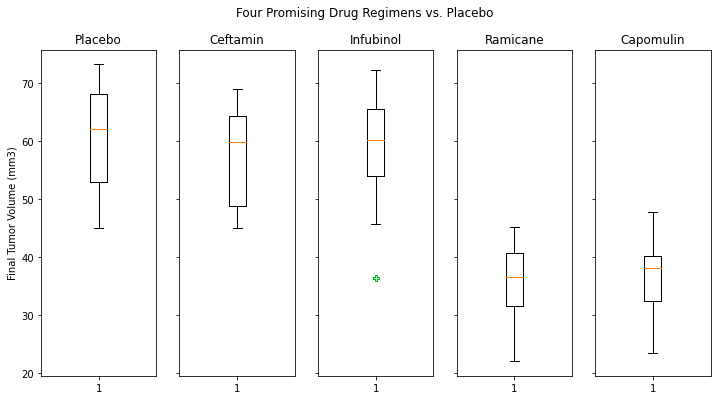

In [57]:
fig, (placebo_sub, ceftamin_sub, infubinol_sub, ramicane_sub, capomulin_sub) = plt.subplots(nrows=1, ncols=5, sharey=True, figsize=(12, 6))
fig.suptitle("Four Promising Drug Regimens vs. Placebo")
placebo_sub.set_ylabel("Final Tumor Volume (mm3)")
outliers = dict(markerfacecolor='xkcd:pastel green', markeredgecolor='xkcd:kelly green', marker='P')

placebo_sub.boxplot(placebo["Tumor Volume (mm3)"])
placebo_sub.set_title("Placebo")

ceftamin_sub.boxplot(ceftamin["Tumor Volume (mm3)"])
ceftamin_sub.set_title("Ceftamin")

infubinol_sub.boxplot(infubinol["Tumor Volume (mm3)"], flierprops=outliers)
infubinol_sub.set_title("Infubinol")

ramicane_sub.boxplot(ramicane["Tumor Volume (mm3)"])
ramicane_sub.set_title("Ramicane")

capomulin_sub.boxplot(capomulin["Tumor Volume (mm3)"])
capomulin_sub.set_title("Capomulin")

## Line and Scatter Plots

In [58]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Last Timepoint
650,w150,10,39.952347,0,Capomulin,Male,23,23,10
801,r157,15,46.539206,0,Capomulin,Male,22,25,15
930,f966,20,30.485985,0,Capomulin,Male,16,17,20
1497,j246,35,38.753265,1,Capomulin,Female,21,21,35
1764,b128,45,38.982878,2,Capomulin,Female,9,22,45
1769,t565,45,34.455298,0,Capomulin,Female,20,17,45
1771,l509,45,41.483008,3,Capomulin,Male,17,21,45
1777,g288,45,37.074024,1,Capomulin,Male,3,19,45
1788,r554,45,32.377357,3,Capomulin,Female,8,17,45
1791,g316,45,40.159220,2,Capomulin,Female,22,22,45


In [59]:
#picking mouse t565
#the capomulin df only shows the final results, not every timepoint, so we have to go back to the full results df
t565 = results.loc[results["Mouse ID"]=="t565",:]
t565.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
245,t565,0,45.000000,0,Capomulin,Female,20,17
460,t565,5,45.895647,0,Capomulin,Female,20,17
659,t565,10,46.749006,0,Capomulin,Female,20,17
785,t565,15,44.440949,0,Capomulin,Female,20,17
1039,t565,20,39.070214,0,Capomulin,Female,20,17


In [60]:
x_t565 = t565["Timepoint"]
y_t565 = t565["Tumor Volume (mm3)"]

Text(0.5, 0, 'Days on Treatment')

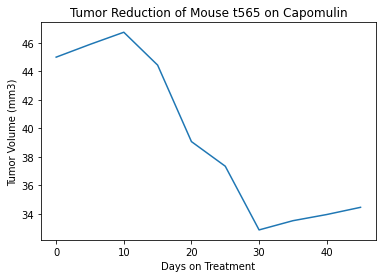

In [61]:
plt.plot(x_t565, y_t565)
plt.title("Tumor Reduction of Mouse t565 on Capomulin")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Days on Treatment")
#assuming this is measured in days for the sake of having a nice label

In [62]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_all_time = results.loc[results["Drug Regimen"]=="Capomulin",:]
cap_by_mouse = cap_all_time.groupby("Mouse ID")

In [63]:
cap_mice_mean_vol = cap_by_mouse["Tumor Volume (mm3)"].mean()
cap_mice_weight = cap_by_mouse["Weight (g)"].mean()
#since the weights don't change over time the mean doesn't mean a lot, 
#but I wanted to pull from the same df to make sure they had the samne index

Text(20, 35, 'y = 0.95x + 21.55')

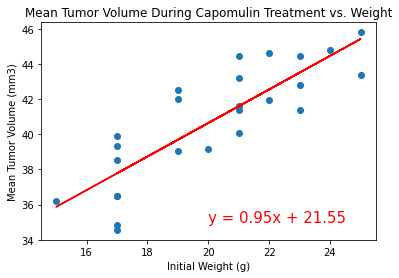

In [64]:
plt.scatter(cap_mice_weight, cap_mice_mean_vol)
plt.title("Mean Tumor Volume During Capomulin Treatment vs. Weight")
plt.ylabel("Mean Tumor Volume (mm3)")
plt.xlabel("Initial Weight (g)")

#linear regression

x_values = np.array(cap_mice_weight)
y_values = np.array(cap_mice_mean_vol)
#converted to numpy array to fix this issue: https://stackoverflow.com/questions/26690480/matplotlib-valueerror-x-and-y-must-have-same-first-dimension

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = cap_mice_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,35),fontsize=15,color="red")

## Correlation and Regression

In [66]:
# linear regression is plotted in the figure above

print(f"The linear regression model for weight and average tumor volume in the Capomulin group is {line_eq}.")

The linear regression model for weight and average tumor volume in the Capomulin group is y = 0.95x + 21.55.


In [68]:
correlation = st.pearsonr(cap_mice_weight,cap_mice_mean_vol)
print(f"The correlation coefficient for weight and average tumor volume in the Capomulin group is {round(correlation[0],2)}")

The correlation coefficient for weight and average tumor volume in the Capomulin group is 0.84
